This is the project for Machine Learning at UA. 
First, we import the datasets into the notebook after we downloaded the files from the website.

In [71]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# read csv files
cleveland_df   = pd.read_csv("processed.cleveland.data", header=None, na_values =["?", -9.0])
switzerland_df = pd.read_csv("processed.switzerland.data", header=None, na_values =["?", -9.0])
va_df          = pd.read_csv("processed.va.data", header=None, na_values =["?", -9.0])
hungarian_df   = pd.read_csv("processed.hungarian.data", header=None, na_values =["?", -9.0])

Now we need to organize the data and add headers to the data frames. 

In [43]:
#add a column to keep track of the source of the data
cleveland_df["Source"] = "cleveland"
switzerland_df["Source"] = "switzerland"
va_df["Source"] = "va"
hungarian_df["Source"] = "hungarian"

In [44]:
# add headers to the data frames
headers = {0 : "age",
               1 : "sex",
               2 : "cp",
               3 : "trestbps",
               4 : "chol",
               5 : "fbs",
               6 : "restecg",
               7 : "thalach",
               8 : "exang",
               9 : "oldpeak",
               10 : "slope",
               11 : "ca",
               12 : "thal",
               13 : "diagnosis"}

cleveland_df = cleveland_df.rename(columns=headers)
switzerland_df = switzerland_df.rename(columns=headers)
va_df = va_df.rename(columns=headers)
hungarian_df = hungarian_df.rename(columns=headers)

Now we want to combine the different datasets from Cleveland, Switzerland, Va and Hungary into one big dataset. 

In [45]:
heart_disease_df = pd.concat([cleveland_df, switzerland_df, va_df, hungarian_df])

Next, we want to look at some details of the dataset. 

In [46]:
print(heart_disease_df.head())
print()
print(heart_disease_df.info())
print()

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  diagnosis     Source  
0    3.0  0.0   6.0          0  cleveland  
1    2.0  3.0   3.0          2  cleveland  
2    2.0  2.0   7.0          1  cleveland  
3    3.0  0.0   3.0          0  cleveland  
4    1.0  0.0   3.0          0  cleveland  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 293
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        920 non-null    float64
 1   sex        920 non-null    float64
 2   cp

Next, let's use the command from the lecture to describe the data. 

In [47]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Let's collect some more information concerning the dataset. 


In [48]:
print(heart_disease_df.shape)
print(heart_disease_df.size)

(920, 15)
13800


Some more analytics. There are 920 observations with 15 14 features each, resulting in one diagnosis.

In [49]:
heart_disease_df.corr(method = 'pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
age,1.000000,0.056889,0.166245,0.244253,-0.086234,0.233726,0.212719,-0.365778,0.201626,0.258243,0.155032,0.370416,0.137298,0.339596
sex,0.056889,1.000000,0.170392,0.001087,-0.197281,0.089191,-0.015612,-0.179320,0.181420,0.103930,0.125154,0.094123,0.373927,0.259342
cp,0.166245,0.170392,1.000000,0.025075,-0.132576,0.039838,0.031101,-0.349189,0.419384,0.244245,0.202989,0.214975,0.313150,0.397896
trestbps,0.244253,0.001087,0.025075,1.000000,0.092853,0.160235,0.098857,-0.104899,0.152328,0.161908,0.063387,0.093705,0.107555,0.122291
chol,-0.086234,-0.197281,-0.132576,0.092853,1.000000,0.024847,0.116494,0.236121,-0.034557,0.047734,-0.059276,0.051606,-0.179903,-0.231547
fbs,0.233726,0.089191,0.039838,0.160235,0.024847,1.000000,0.132347,-0.053386,0.029176,0.055277,0.092142,0.149539,0.105871,0.155533
restecg,0.212719,-0.015612,0.031101,0.098857,0.116494,0.132347,1.000000,0.053120,0.032331,0.118297,-0.014771,0.139154,-0.040084,0.140089
thalach,-0.365778,-0.179320,-0.349189,-0.104899,0.236121,-0.053386,0.053120,1.000000,-0.356439,-0.151174,-0.360622,-0.264094,-0.327360,-0.366265
exang,0.201626,0.181420,0.419384,0.152328,-0.034557,0.029176,0.032331,-0.356439,1.000000,0.392492,0.319424,0.127385,0.340737,0.388408
oldpeak,0.258243,0.103930,0.244245,0.161908,0.047734,0.055277,0.118297,-0.151174,0.392492,1.000000,0.421184,0.281817,0.254391,0.443084


Analyse the Pearson correlation coefficient, to find connections within the dataset. 

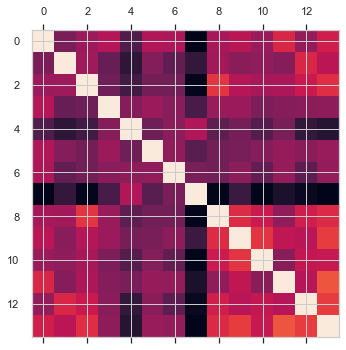

In [70]:
plt.matshow(heart_disease_df.corr())
plt.show()

In [76]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = heart_disease_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
age,1.000000,0.056889,0.166245,0.244253,-0.086234,0.233726,0.212719,-0.365778,0.201626,0.258243,0.155032,0.370416,0.137298,0.339596
sex,0.056889,1.000000,0.170392,0.001087,-0.197281,0.089191,-0.015612,-0.179320,0.181420,0.103930,0.125154,0.094123,0.373927,0.259342
cp,0.166245,0.170392,1.000000,0.025075,-0.132576,0.039838,0.031101,-0.349189,0.419384,0.244245,0.202989,0.214975,0.313150,0.397896
trestbps,0.244253,0.001087,0.025075,1.000000,0.092853,0.160235,0.098857,-0.104899,0.152328,0.161908,0.063387,0.093705,0.107555,0.122291
chol,-0.086234,-0.197281,-0.132576,0.092853,1.000000,0.024847,0.116494,0.236121,-0.034557,0.047734,-0.059276,0.051606,-0.179903,-0.231547
fbs,0.233726,0.089191,0.039838,0.160235,0.024847,1.000000,0.132347,-0.053386,0.029176,0.055277,0.092142,0.149539,0.105871,0.155533
restecg,0.212719,-0.015612,0.031101,0.098857,0.116494,0.132347,1.000000,0.053120,0.032331,0.118297,-0.014771,0.139154,-0.040084,0.140089
thalach,-0.365778,-0.179320,-0.349189,-0.104899,0.236121,-0.053386,0.053120,1.000000,-0.356439,-0.151174,-0.360622,-0.264094,-0.327360,-0.366265
exang,0.201626,0.181420,0.419384,0.152328,-0.034557,0.029176,0.032331,-0.356439,1.000000,0.392492,0.319424,0.127385,0.340737,0.388408
oldpeak,0.258243,0.103930,0.244245,0.161908,0.047734,0.055277,0.118297,-0.151174,0.392492,1.000000,0.421184,0.281817,0.254391,0.443084


Data Visualization

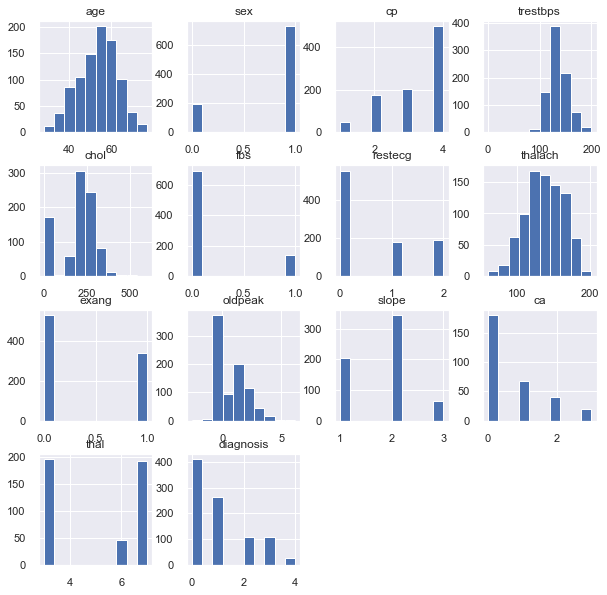

In [55]:
sns.set()
heart_disease_df.hist(figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='Count'>

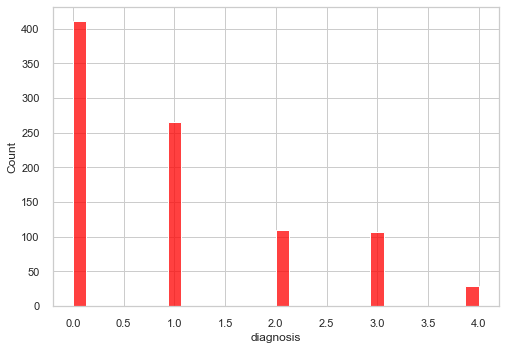

In [64]:
heart_disease_df.head()
sns.set_style('whitegrid')
sns.histplot(heart_disease_df['diagnosis'], kde = False, color ='red', bins = 30)

<AxesSubplot:xlabel='age', ylabel='diagnosis'>

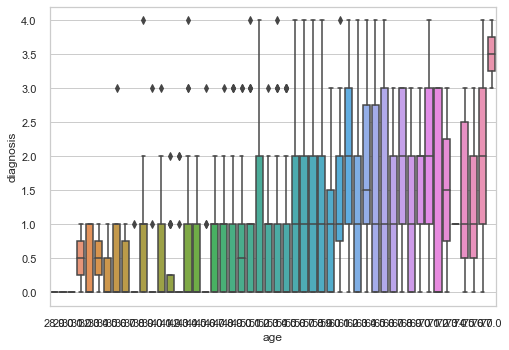

In [77]:
sns.boxplot(x='age',y='diagnosis',data=heart_disease_df)

<AxesSubplot:xlabel='ca', ylabel='diagnosis'>

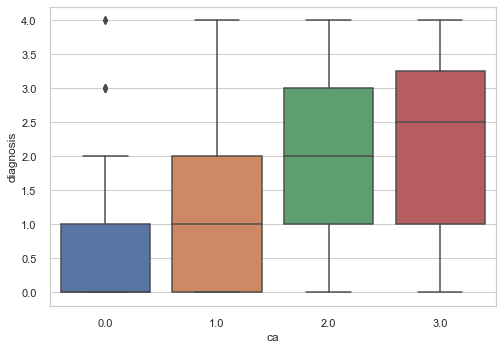

In [78]:
sns.boxplot(x='ca',y='diagnosis',data=heart_disease_df)

C:\Users\Nikolas Recke\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Nikolas Recke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikolas Recke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikolas Recke\anaconda3\lib\site-packages\seaborn\distributions.py

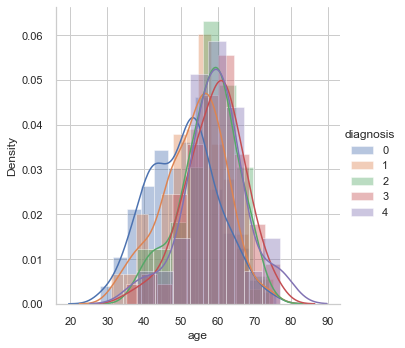